# Avacado Project
## Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

## Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

## Some relevant columns in the dataset:

1. Date - The date of the observation
2. AveragePrice - the average price of a single avocado
3. type - conventional or organic
4. year - the year
5. Region - the city or region of the observation
6. Total Volume - Total number of avocados sold
7. 4046 - Total number of avocados with PLU 4046 sold
8. 4225 - Total number of avocados with PLU 4225 sold
9. 4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

Your task is to make a model that can consider the data provided and predict the Average Price.

### To download the dataset, use the link given below. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRt7LOZMnvmuI7i93akZAHA4XZeVf3d2McZZC_Y7dBvzThRivuzP2ONK2_005TJWLZpyg&usqp=CAU)

In [1]:
'''Importing important libraries'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv', )
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In the given data, null values start for every attributes after the index 1516. So we clip the dataset and only keep the values before this dataset.

In [22]:
data = df.iloc[:1517,:]
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [52]:
data['Date'] =pd.to_datetime(data.Date)

data.sort_values(by=['Date'], inplace=True, ascending=True)

data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1265,2015-01-02,0.71,916367.42,611270.39,205181.23,14107.36,85808.44,82065.70,3742.74,0.0,conventional,2015.0,WestTexNewMexico
1111,2015-01-02,0.97,135656.36,35897.25,84741.31,2704.69,12313.11,12276.59,36.52,0.0,conventional,2015.0,Spokane
1011,2015-01-02,0.91,469684.32,284674.20,78055.21,27248.16,79706.75,51793.30,27913.45,0.0,conventional,2015.0,SouthCarolina
488,2015-01-02,0.92,245352.56,7245.61,181784.28,14761.53,41561.14,20669.59,18130.75,2760.8,conventional,2015.0,Indianapolis
755,2015-01-02,1.14,569304.80,30263.22,417993.89,1722.10,119325.59,104365.66,14959.93,0.0,conventional,2015.0,Philadelphia


We have obtained the dataset. In this case study, we have to predict the Average price of the Avacado. So it is the target variable. The problem is a supervised regression problem.
# Exploratory Data Analysis:
We start off with the EDA of the data. First of all we make a copy of the dataset such that the we can explore the data.

In [159]:
ds = data.copy()
ds.sample(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1063,2015-04-01,0.98,3204112.16,2296069.27,320373.63,18938.42,568730.84,287820.14,280910.70,0.00,conventional,2015.0,Southeast
617,2015-06-28,1.06,159981.66,90881.66,19436.14,8297.63,41366.23,36900.28,3662.58,803.37,conventional,2015.0,Nashville
596,2015-11-01,1.28,342796.99,242922.42,36043.54,38.69,63792.34,35069.71,28722.63,0.00,conventional,2015.0,MiamiFtLauderdale
1215,2015-01-11,0.90,5024858.14,1815066.15,1937479.91,132883.59,1139428.49,717110.41,421675.08,643.00,conventional,2015.0,West
123,2015-05-17,1.27,790853.86,63515.06,455166.65,44840.98,227331.17,222163.10,5152.19,15.88,conventional,2015.0,BaltimoreWashington


Since this is machine learning problem, we can remove the date column from the data.

In [160]:
ds.drop(['Date'], axis = 1, inplace = True)
ds.sample(5)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
514,1.24,112332.05,63302.99,19717.01,759.06,28552.99,19135.05,9417.94,0.0,conventional,2015.0,Jacksonville
12,1.31,61007.10,2268.32,49880.67,101.36,8756.75,8379.98,376.77,0.0,conventional,2015.0,Albany
749,1.44,331456.96,15055.12,199103.98,1077.74,116220.12,102101.20,14118.92,0.0,conventional,2015.0,Philadelphia
1370,1.56,397601.10,5233.97,314434.80,3726.92,74205.41,74205.41,0.00,0.0,conventional,2016.0,Boston
1170,1.16,265367.52,133615.12,48153.33,115.96,83483.11,67480.10,16003.01,0.0,conventional,2015.0,Tampa


We see that the total number of bags is equal to small bags + large bags + xlarge bags. Since we already have that data with us as well, so we can remove the total bags from the dataset.

In [161]:
ds.drop(['Total Bags'], axis = 1, inplace = True)
ds.sample(5)

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
540,0.94,370223.11,144461.66,185057.29,4255.15,35205.21,1243.80,0.00,conventional,2015.0,LasVegas
1114,1.25,218562.94,125846.03,33050.99,42.85,59620.93,0.00,2.14,conventional,2015.0,StLouis
790,0.56,1282095.88,981853.86,177850.55,10400.82,81585.03,30405.62,0.00,conventional,2015.0,PhoenixTucson
131,1.10,808897.21,65158.96,524971.24,42381.39,171699.95,4685.67,0.00,conventional,2015.0,BaltimoreWashington
865,1.17,465897.27,180693.46,190950.32,15332.72,78821.71,94.95,4.11,conventional,2015.0,Portland


we will look at the information of the dataset.

In [56]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 1265 to 1364
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Small Bags    1517 non-null   float64
 6   Large Bags    1517 non-null   float64
 7   XLarge Bags   1517 non-null   float64
 8   type          1517 non-null   object 
 9   year          1517 non-null   float64
 10  region        1517 non-null   object 
dtypes: float64(9), object(2)
memory usage: 142.2+ KB


From the above information, we see that the we have 8 columns including the target variable who are of float64 data-type. We have two features 'type' and 'region' which are of object data type. We will encode these variables later.
## Handling Null Values.
We see from the info that null values are not seen in the data. We will visualise presence of null values.

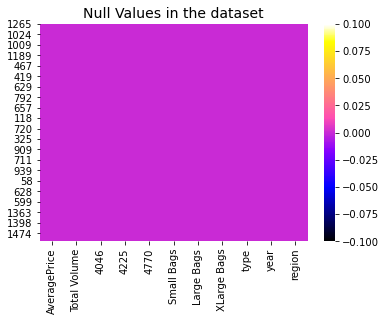

In [57]:
plt.title("Null Values in the dataset", fontsize = 14)
sns.heatmap(ds.isnull(), cmap = 'gnuplot2')
plt.show()

Since null values are not present in the data, its handling is not required.

## Descriptive Statistics:
Before encoding the categotrical values, we look at the descriptive statistics for the continous features.

In [58]:
ds.describe()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


we can that for features, the numerical values are given in octadecimal. we will use min-max function to get the values for descritive statistics.

In [59]:
col_values = ds.columns.values
num_col = col_values[:8]
num_col

array(['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Small Bags', 'Large Bags', 'XLarge Bags'], dtype=object)

In [60]:
for i in num_col:
    print(f"{i} minimum value:{ds[i].min()}, maximum value:{ds[i].max()}")

AveragePrice minimum value:0.49, maximum value:1.68
Total Volume minimum value:38750.74, maximum value:44655461.51
4046 minimum value:467.72, maximum value:18933038.04
4225 minimum value:1783.77, maximum value:18956479.74
4770 minimum value:0.0, maximum value:1381516.11
Small Bags minimum value:3311.77, maximum value:5893641.72
Large Bags minimum value:0.0, maximum value:1121076.47
XLarge Bags minimum value:0.0, maximum value:108072.79


Some of the insights that we get for the data are:
1. The lowest average price is 0.49 and Maximum average price is the 1.68 for each avacado.

We plot some figures for the data visualisation and see the impact of the attribute on the target variable.

<AxesSubplot:xlabel='type', ylabel='count'>

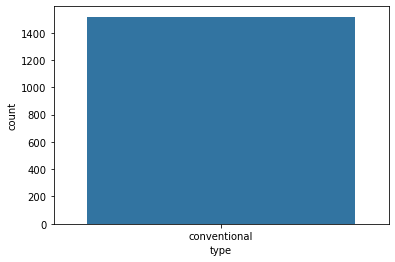

In [61]:
sns.countplot(data = ds, x = 'type')

In [62]:
ds.type.unique()

array(['conventional'], dtype=object)

We only have one value of the type of avacado, which is conventional. We can drop the feature 'type' from the dataset.

In [162]:
ds.drop(['type'], axis = 1, inplace = True)

## Correlation:
We look at the correlation between the the target and the features of the data.

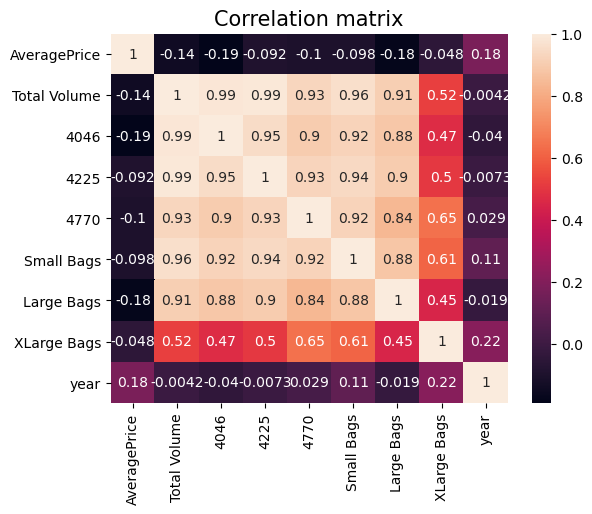

In [148]:
plt.title("Correlation matrix", fontsize = 15)
sns.heatmap(ds.corr(), annot = True)
plt.show()

From the correlation matrix, we get the information that feature 'Total Volume' is very correlated (0.99) to '4046' and '4225'. We will also drop this feature from the data.

In [163]:
ds.drop(['Total Volume'], axis = 1, inplace = True)

Now we will look at the different plots to look at the relation between targets and features. First we see the average price according to the year.

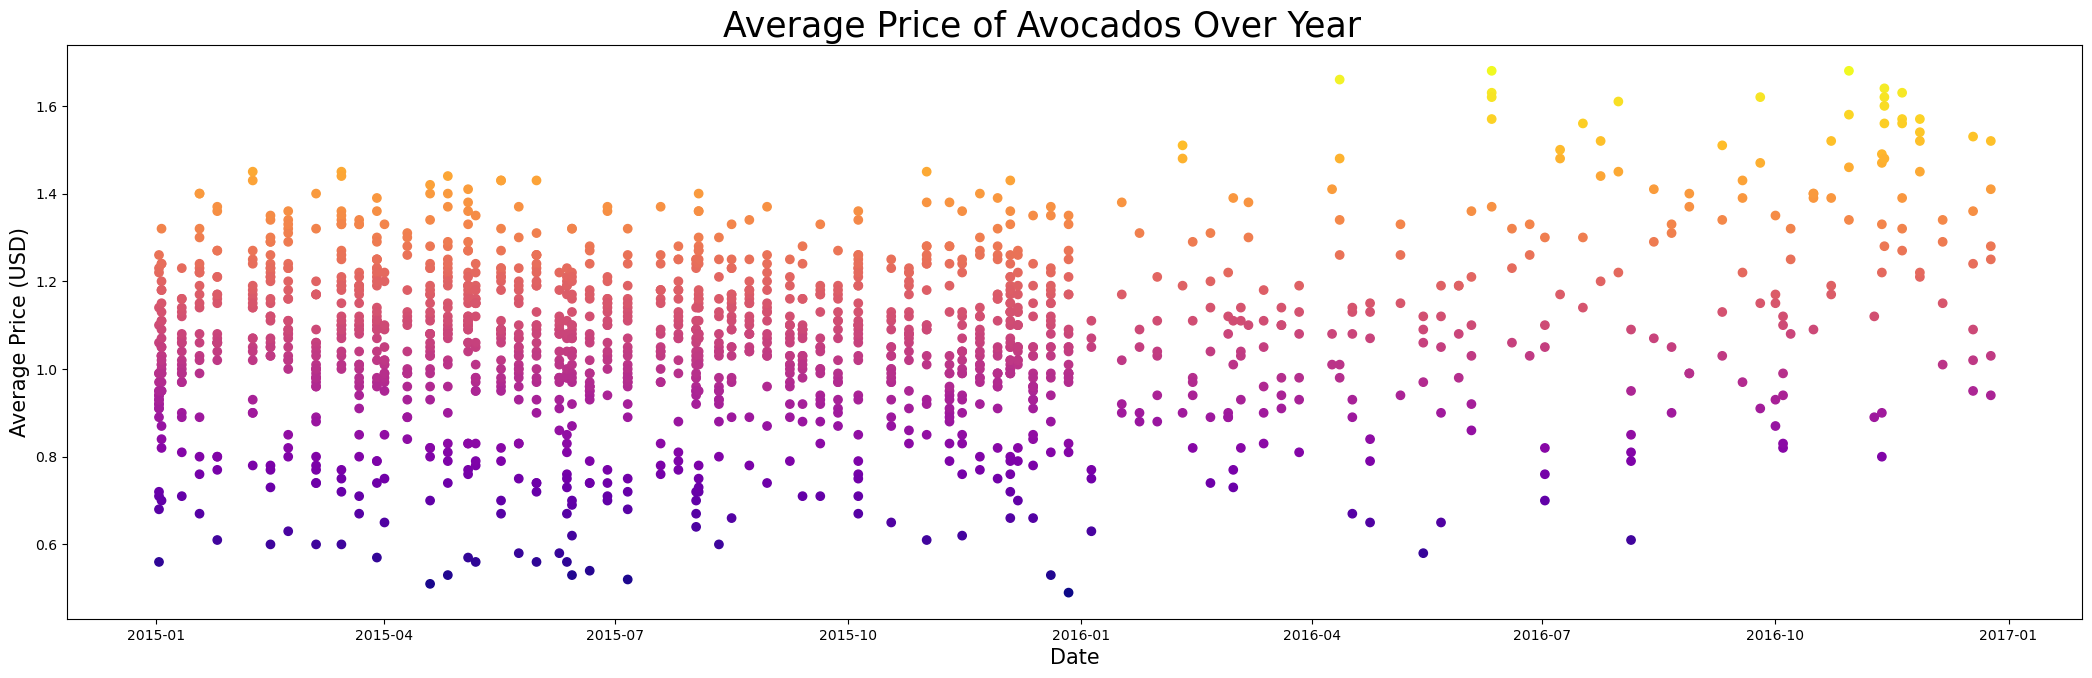

In [113]:
# Average price of Conventional Avocados over time

plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (26, 7))
fig.suptitle('Average Price of Avocados Over Year', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

dates = data['Date'].tolist()
avgPrices = data['AveragePrice'].tolist()

plt.scatter(dates, avgPrices, c=avgPrices, cmap='plasma')
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.show()

We see that the average prices of avacados after April of 2016 are higher than before. Also less Avacados were bought after the January 2016.

Now we have a look at the average prices according to the region to see if there is any particular region which had the higher higher prces that other region.

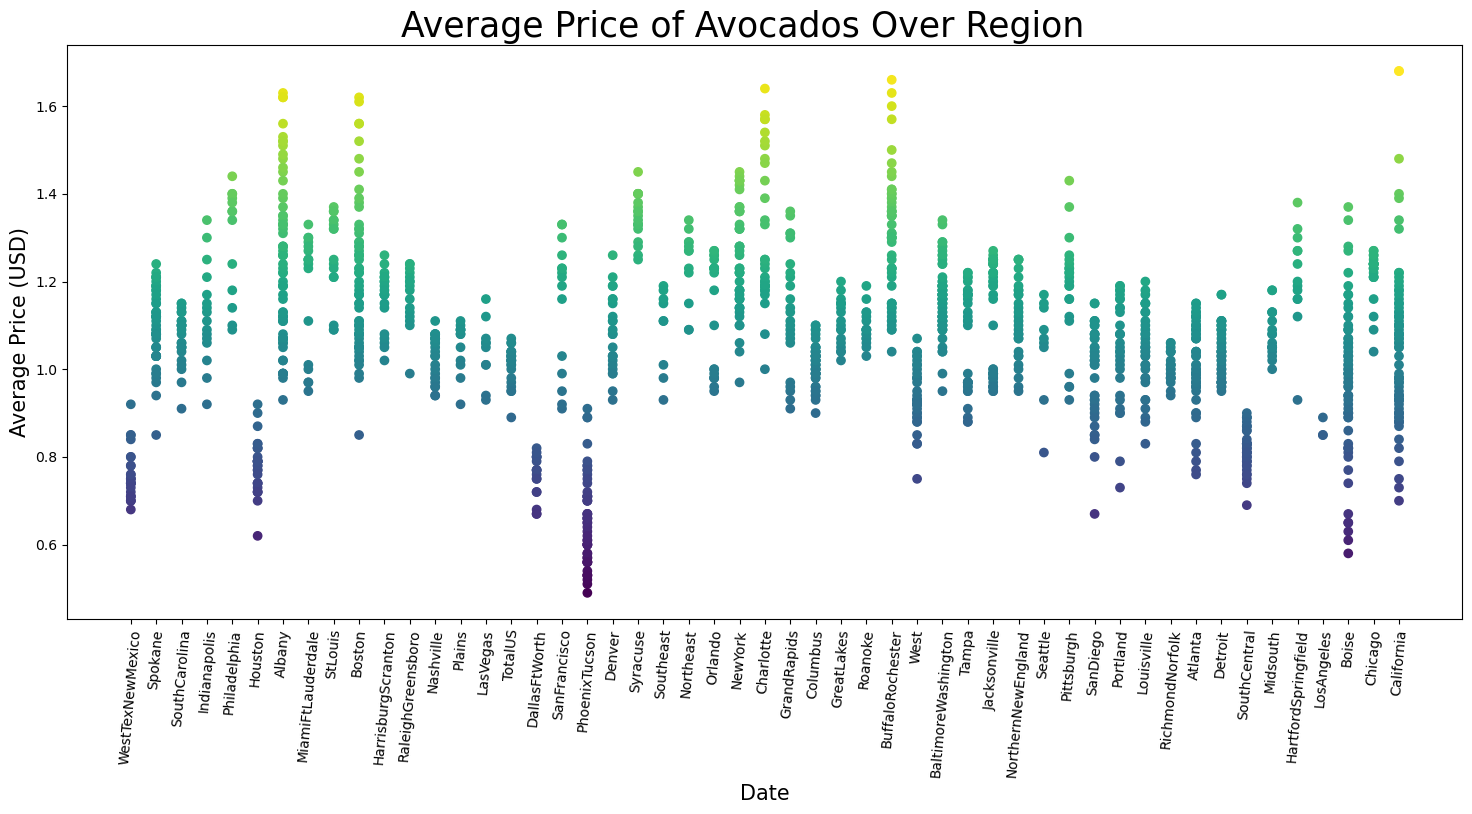

In [117]:
# Average price of Conventional Avocados over region

plt.rc('figure', titlesize=50)
fig = plt.figure(figsize = (18, 7))
fig.suptitle('Average Price of Avocados Over Region', fontsize=25)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.93)

region = data['region'].tolist()
avgPrices = data['AveragePrice'].tolist()

plt.scatter(region, avgPrices, c=avgPrices)
ax.set_xlabel('Date',fontsize = 15)
ax.set_ylabel('Average Price (USD)', fontsize = 15)
plt.xticks(rotation=85)
plt.show()

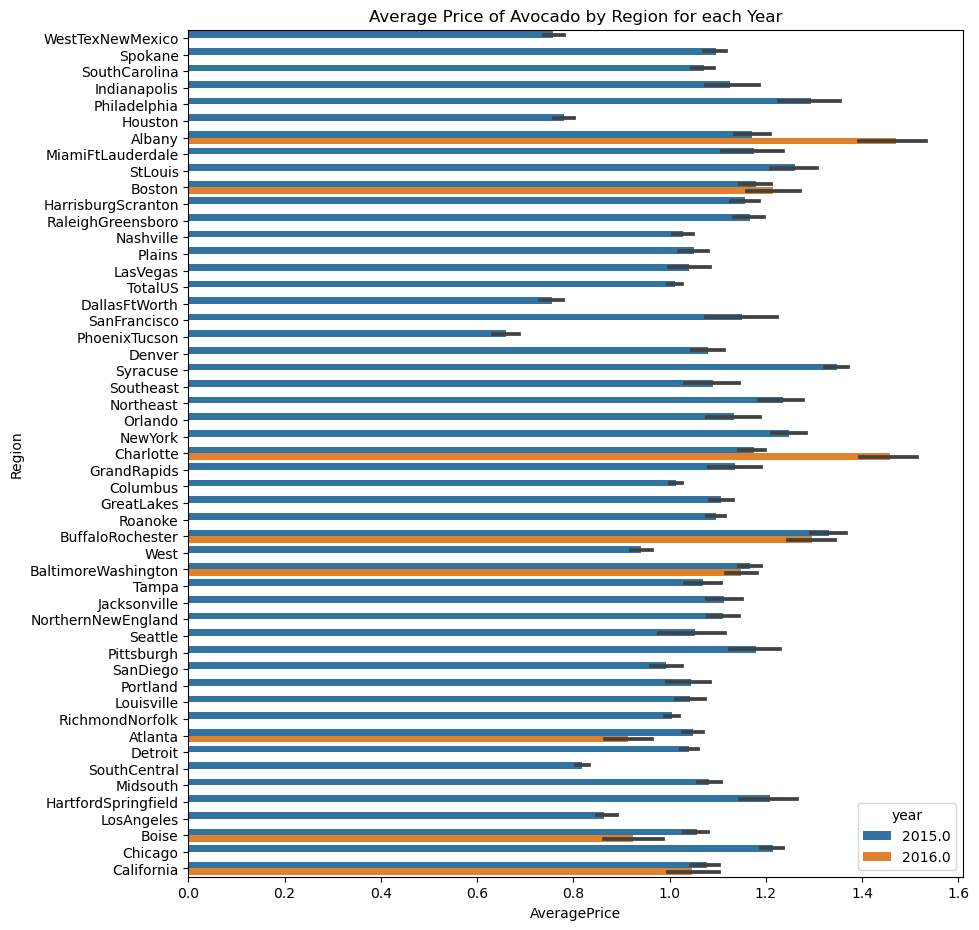

In [107]:
# The average prices by regions for each year
plt.figure(figsize=(10,11))
plt.title("Average Price of Avocado by Region for each Year")
sns.barplot(x="AveragePrice",y="region",data= ds, hue = 'year')
plt.ylabel("Region")
plt.show()

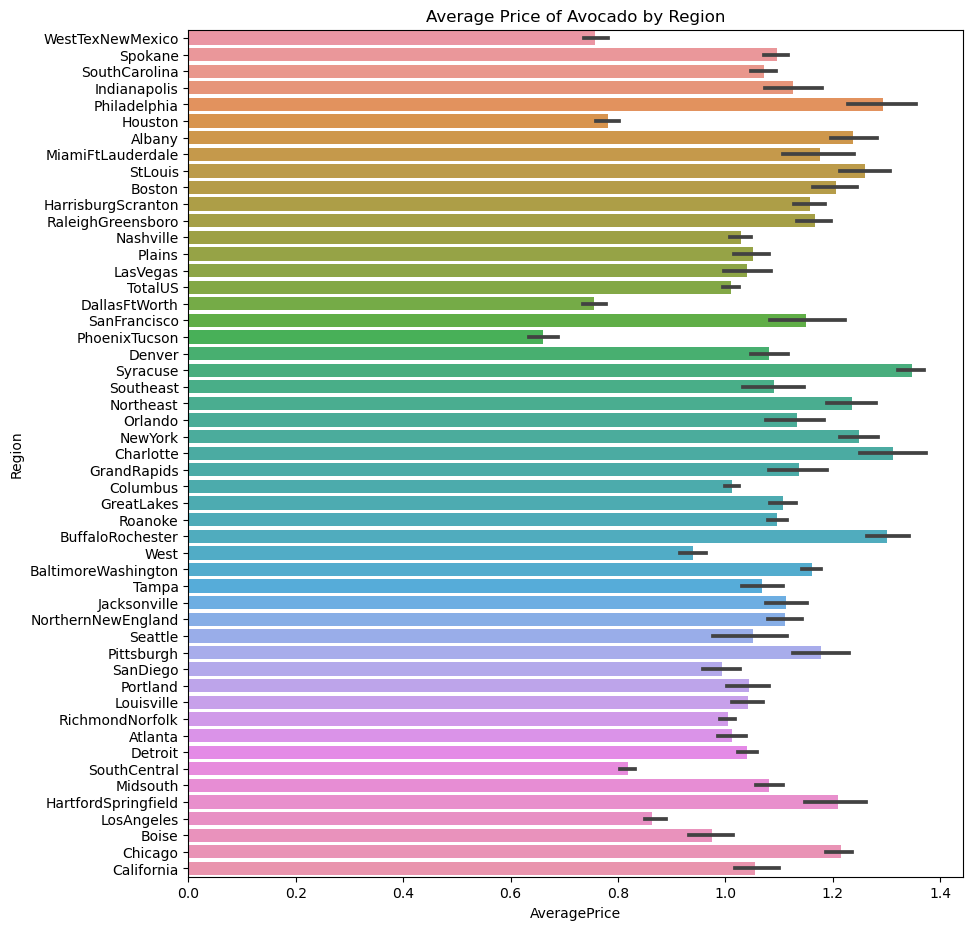

In [108]:
# The average prices by regions
plt.figure(figsize=(10,11))
plt.title("Average Price of Avocado by Region")
sns.barplot(x="AveragePrice",y="region",data= ds)
plt.ylabel("Region")
plt.show()

For the year 2015 Phoenix Tucson region had the lowest average price for an Avacado and the highest price was given by the region Buffalo Rochester and Syracuse. For the year 2016, the lowest average price was in Atlanta and Boise. Highest average price in year 2016 was in region Alabany and Charlotte.

In Charlotte , highest average price was recevied for both years and lowest price in Phoenix Tucson.

<AxesSubplot:>

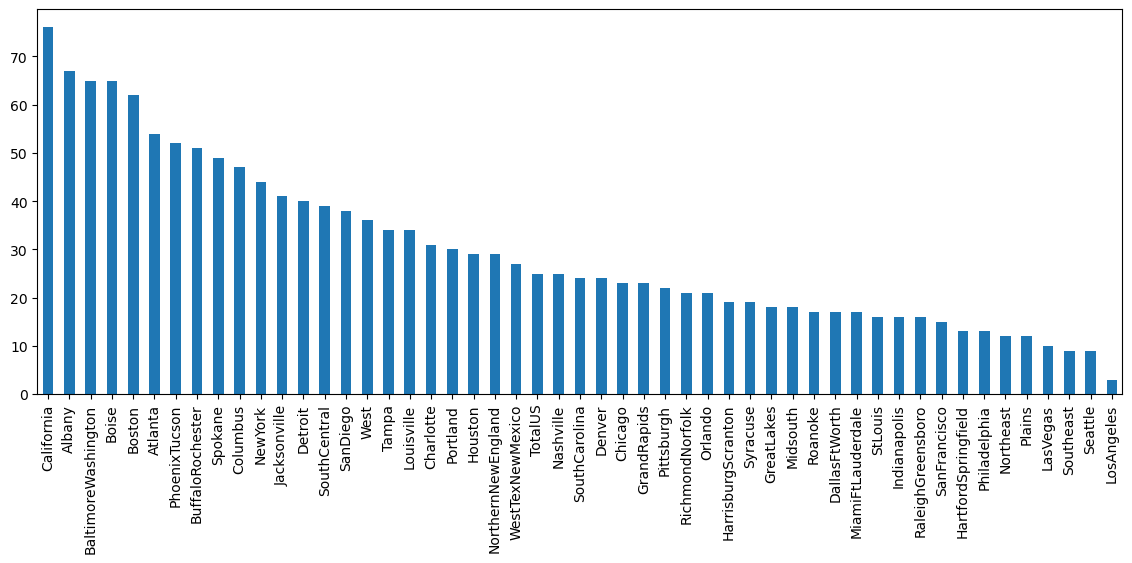

In [111]:
ds.region.value_counts().plot.bar(figsize = (14,5))

From the above plot, we see the number of avacados that are sold in different regions. We see that most of the samples we have are from California, Albany, BaltimoreWashington and Boise. Las Vegas, Southeast, Seattle, LosAngeles has the least number of samples. We will now encode the values of the region feature. We will encode it with the frequency encoding and replace it with the number of times a unique variable occurs in that feature.

In [150]:
region_freqmap = ds['region'].value_counts().to_dict()
region_freqmap

{'California': 76,
 'Albany': 67,
 'BaltimoreWashington': 65,
 'Boise': 65,
 'Boston': 62,
 'Atlanta': 54,
 'PhoenixTucson': 52,
 'BuffaloRochester': 51,
 'Spokane': 49,
 'Columbus': 47,
 'NewYork': 44,
 'Jacksonville': 41,
 'Detroit': 40,
 'SouthCentral': 39,
 'SanDiego': 38,
 'West': 36,
 'Tampa': 34,
 'Louisville': 34,
 'Charlotte': 31,
 'Portland': 30,
 'Houston': 29,
 'NorthernNewEngland': 29,
 'WestTexNewMexico': 27,
 'TotalUS': 25,
 'Nashville': 25,
 'SouthCarolina': 24,
 'Denver': 24,
 'Chicago': 23,
 'GrandRapids': 23,
 'Pittsburgh': 22,
 'RichmondNorfolk': 21,
 'Orlando': 21,
 'HarrisburgScranton': 19,
 'Syracuse': 19,
 'GreatLakes': 18,
 'Midsouth': 18,
 'Roanoke': 17,
 'DallasFtWorth': 17,
 'MiamiFtLauderdale': 17,
 'StLouis': 16,
 'Indianapolis': 16,
 'RaleighGreensboro': 16,
 'SanFrancisco': 15,
 'HartfordSpringfield': 13,
 'Philadelphia': 13,
 'Northeast': 12,
 'Plains': 12,
 'LasVegas': 10,
 'Southeast': 9,
 'Seattle': 9,
 'LosAngeles': 3}

In [164]:
ds['region_enc'] = ds['region'].apply(lambda x : region_freqmap[x])
ds['region_enc'].head(3)

1265    27
1111    49
1011    24
Name: region_enc, dtype: int64

We have encoded the values using the frequency encoding, we will remove the region feature from the dataset.

In [165]:
ds.drop(['region'], axis = 1, inplace = True)

In [166]:
ds.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region_enc
1265,0.71,611270.39,205181.23,14107.36,82065.70,3742.74,0.0,2015.0,27
1111,0.97,35897.25,84741.31,2704.69,12276.59,36.52,0.0,2015.0,49
1011,0.91,284674.20,78055.21,27248.16,51793.30,27913.45,0.0,2015.0,24
488,0.92,7245.61,181784.28,14761.53,20669.59,18130.75,2760.8,2015.0,16
755,1.14,30263.22,417993.89,1722.10,104365.66,14959.93,0.0,2015.0,13


## Scaling:
The values in the dataset vary largely for each feature, so before the model building, it is important to scale the data to make it better. Here, we will use the standard scaler as the scaling technique.

In [154]:
from sklearn.preprocessing import StandardScaler

In [168]:
scale = StandardScaler()
ds.loc[:,"4046":"region_enc"] = scale.fit_transform(ds.loc[:,"4046":"region_enc"])
ds.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region_enc
1265,0.71,-0.018063,-0.242925,-0.263534,-0.257558,-0.329162,-0.292727,-0.441008,-0.682212
1111,0.97,-0.313585,-0.314943,-0.346321,-0.365380,-0.360524,-0.292727,-0.441008,0.488627
1011,0.91,-0.185809,-0.318941,-0.168129,-0.304328,-0.124632,-0.292727,-0.441008,-0.841872
488,0.92,-0.328301,-0.256915,-0.258785,-0.352413,-0.207412,0.077688,-0.441008,-1.267631
755,1.14,-0.316479,-0.115671,-0.353455,-0.223105,-0.234243,-0.292727,-0.441008,-1.427291


Ww have now scaled the data and performed all the necessary feature engineering. We will now build the model for the case study.
# Model Building:
we start by finding out the best random state that we can use for splitting the data.

In [172]:
x = ds.loc[:,"4046":"region_enc"]
y = ds.loc[:,'AveragePrice']

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

max_accuracy = 0
best_rs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_accuracy: # after each iteration, acc is replace by the best possible accuracy
        max_accuracy = acc
        best_rs = i
print(f"Best Random State is {best_rs}")

Best Random State is 160


In [176]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 160)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1213, 8) (304, 8) (1213,) (304,)


In [175]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [178]:
lr = LinearRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)
print("Accuracy Score of Linear Regression model is", r2_score(y_test, pred_lr)*100)

ls = Lasso()
ls.fit(x_train, y_train)
pred_ls = ls.predict(x_test)
print("Accuracy Score of Lasso Regression model is", r2_score(y_test, pred_ls)*100)

rd = Ridge()
rd.fit(x_train, y_train)
pred_rd = rd.predict(x_test)
print("Accuracy Score of Ridge Regression model is", r2_score(y_test, pred_rd)*100)

knr = KNeighborsRegressor()
knr.fit(x_train, y_train)
pred_knr = knr.predict(x_test)
print("Accuracy Score of KNeighbors Regressor model is", r2_score(y_test, pred_knr)*100)

svr = SVR()
svr.fit(x_train, y_train)
pred_svr = svr.predict(x_test)
print("Accuracy Score of SVR model is", r2_score(y_test, pred_svr)*100)

dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
pred_dtr = dtr.predict(x_test)
print("Accuracy Score of Decision Tree Regressor model is", r2_score(y_test, pred_dtr)*100)

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
pred_gbr = gbr.predict(x_test)
print("Accuracy Score of Gradient Boosting Regressor model is", r2_score(y_test, pred_gbr)*100)

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
pred_rfr = rfr.predict(x_test)
print("Accuracy Score of Random Forest Regressor model is", r2_score(y_test, pred_rfr)*100)

Accuracy Score of Linear Regression model is 23.804425535968775
Accuracy Score of Lasso Regression model is -0.24706284265127998
Accuracy Score of Ridge Regression model is 23.814919419513313
Accuracy Score of KNeighbors Regressor model is 81.17694589869656
Accuracy Score of SVR model is 64.6631505141083
Accuracy Score of Decision Tree Regressor model is 52.232622012664095
Accuracy Score of Gradient Boosting Regressor model is 70.22782532410191
Accuracy Score of Random Forest Regressor model is 82.40554094793804


we see that we get the highest performance by random forest regressor. we will cross validate the model to check the overfitting.

In [180]:
from sklearn.model_selection import cross_val_score

lr_scores = cross_val_score(lr, x, y, scoring='r2', cv = 5) # cross validating the model
print(lr_scores) # accuracy scores of each cross validation cycle
print(f"Mean of accuracy scores is for Linear Regression is {lr_scores.mean()*100}\n")

ls_scores = cross_val_score(ls, x, y, scoring='r2', cv = 5)
print(ls_scores)
print(f"Mean of accuracy scores is for Lasso Regression is {ls_scores.mean()*100}\n")

rd_scores = cross_val_score(rd, x, y, scoring='r2', cv = 5)
print(rd_scores)
print(f"Mean of accuracy scores is for Ridge Regression is {rd_scores.mean()*100}\n")

knr_scores = cross_val_score(knr, x, y, scoring='r2', cv = 5)
print(knr_scores)
print(f"Mean of accuracy scores is for KNeighbors Regressor is {knr_scores.mean()*100}\n")

svr_scores = cross_val_score(svr, x, y, scoring='r2', cv = 5)
print(svr_scores)
print(f"Mean of accuracy scores is for SVR is {svr_scores.mean()*100}\n")

dtr_scores = cross_val_score(dtr, x, y, scoring='r2', cv = 5)
print(dtr_scores)
print(f"Mean of accuracy scores is for Decision Tree Regressor is {dtr_scores.mean()*100}\n")

gbr_scores = cross_val_score(gbr, x, y, scoring='r2', cv = 5)
print(gbr_scores)
print(f"Mean of accuracy scores is for Gradient Boosting Regressor is {gbr_scores.mean()*100}\n")

rfr_scores = cross_val_score(rfr, x, y, scoring = 'r2', cv = 5)
print(rfr_scores)
print(f"Mean of accuracy scores is for Random Forest Regressor is {rfr_scores.mean()*100}\n")

[ 0.07815339  0.18065046  0.14453591  0.14438629 -0.22262248]
Mean of accuracy scores is for Linear Regression is 6.502071389775517

[-0.0018784  -0.00487488 -0.0304427  -0.01976695 -0.08924647]
Mean of accuracy scores is for Lasso Regression is -2.9241881376141654

[ 0.08331506  0.17953922  0.14507637  0.1446358  -0.21376498]
Mean of accuracy scores is for Ridge Regression is 6.776029717853796

[0.81761821 0.83432146 0.82514845 0.74549524 0.34668428]
Mean of accuracy scores is for KNeighbors Regressor is 71.38535276466533

[0.61584255 0.59777701 0.59051292 0.51420728 0.08536092]
Mean of accuracy scores is for SVR is 48.074013642510195

[0.63848562 0.72805161 0.60561364 0.59071121 0.00542246]
Mean of accuracy scores is for Decision Tree Regressor is 51.36569065988328

[0.74465195 0.73548094 0.75373777 0.64079809 0.14769002]
Mean of accuracy scores is for Gradient Boosting Regressor is 60.44717521114236

[0.82396212 0.81851369 0.84062507 0.75723246 0.20963864]
Mean of accuracy scores is

Best validation score is given by k-neighbours regressor. now we will tune both random forest and knn to evaluate the performance of these models.
## Hyperparameter tuning:
first for random forest model-

In [182]:
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor()
param = dict()
param['criterion'] = ['mse', 'mae']
param['max_features'] = ['auto', 'sqrt', 'log2']
param['n_estimators'] = [1, 2, 4, 8, 10, 16, 32, 64, 100, 200]
param['min_samples_split'] = [1,2,5,8,10,15,20,25,50,55,60,80,100]


gs = GridSearchCV(estimator = rfr, param_grid = param, scoring='neg_mean_absolute_error', cv = 5, n_jobs = 3)
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

-0.06143894534571305
{'criterion': 'mse', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 200}


In [187]:
rf = RandomForestRegressor(criterion = 'mse', max_features = 'auto', min_samples_split = 2, n_estimators= 200)
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print("Accuracy Score of Random Forest Regressor model is", r2_score(y_test, pred_rf)*100)

Accuracy Score of Random Forest Regressor model is 83.10831179295617


In [184]:
knr = KNeighborsRegressor()
param = dict()
param['leaf_size'] = list(range(1,50))
param['n_neighbors'] = list(range(1,30))

gs = GridSearchCV(estimator = knr, param_grid = param, scoring='neg_mean_absolute_error', cv = 5, n_jobs = 3)
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

-0.05982158283168385
{'leaf_size': 1, 'n_neighbors': 3}


In [186]:
knr = KNeighborsRegressor(leaf_size= 1, n_neighbors= 3)
knr.fit(x_train, y_train)
pred_knr = knr.predict(x_test)
print("Accuracy Score of KNeighbors Regressor model is", r2_score(y_test, pred_knr)*100)

Accuracy Score of KNeighbors Regressor model is 82.71922608385253


After the hyperparameter tuning, we see that the random forest regressor has the most accuracy, hence it is used.

# Model Evaluation:
For the model evaluation, we will use the mean squared error and mean absolute error.

In [189]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [190]:
print("Accuracy Score of Random Forest Regressor model is", r2_score(y_test, pred_rf)*100)
print("The mean absolute error of the fitted model is", mae(y_test, pred_rf))
print("The mean squared error of the fitted model is", mse(y_test, pred_rf))
print("The root mean squared error of the fitted model is", np.sqrt(mse(y_test, pred_rf)))

Accuracy Score of Random Forest Regressor model is 83.10831179295617
The mean absolute error of the fitted model is 0.05792944078947354
The mean squared error of the fitted model is 0.005615641159539472
The root mean squared error of the fitted model is 0.07493758175668248


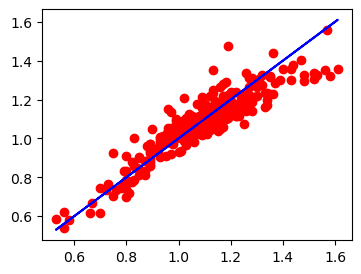

In [191]:
plt.figure(figsize = (4,3))
plt.scatter(x = y_test, y = pred_rf, color = 'r')
plt.plot(y_test, y_test, color = 'b')
plt.show()

From the above evaluation, we see that the model is working accurately with the accuracy score of 83%. The mean absolute error of the model is 0.057 and the root mean squared error is 0.074.

# Serialisation:
We will save Random Forest model.

In [192]:
import joblib
joblib.dump(rf, 'Avacado Average Price Prediction.obj') # saving the model as an object

['Avacado Average Price Prediction.obj']